In [1]:
import os
import glob
import datetime
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [2]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2022-10-31 11:11:07--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2022-10-31 11:11:08--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2022-10-31 11:11:09--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7

In [3]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted( 
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

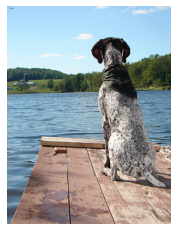

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[4000]));

In [4]:
target = []

for breed in target_paths:
  target.append(breed.split('/',2)[2].rsplit('_',1)[0])

In [5]:
import pandas as pd

In [6]:
list_breeds  = np.unique(target)

In [7]:
cats_vs_dogs = [0 if i[0].isupper() == True else 1 for i in target]

In [8]:
labelEncDict = {name : ind for ind, name in enumerate(list_breeds)}
for k, v in labelEncDict.items():
    print(f"{k:32} : {v}")

Abyssinian                       : 0
Bengal                           : 1
Birman                           : 2
Bombay                           : 3
British_Shorthair                : 4
Egyptian_Mau                     : 5
Maine_Coon                       : 6
Persian                          : 7
Ragdoll                          : 8
Russian_Blue                     : 9
Siamese                          : 10
Sphynx                           : 11
american_bulldog                 : 12
american_pit_bull_terrier        : 13
basset_hound                     : 14
beagle                           : 15
boxer                            : 16
chihuahua                        : 17
english_cocker_spaniel           : 18
english_setter                   : 19
german_shorthaired               : 20
great_pyrenees                   : 21
havanese                         : 22
japanese_chin                    : 23
keeshond                         : 24
leonberger                       : 25
miniature_pinscher    

In [9]:
labelDecDict = {ind: name for name, ind in labelEncDict.items()}
for k, v in labelDecDict.items():
    print(f"{k:3} : {v}")

  0 : Abyssinian
  1 : Bengal
  2 : Birman
  3 : Bombay
  4 : British_Shorthair
  5 : Egyptian_Mau
  6 : Maine_Coon
  7 : Persian
  8 : Ragdoll
  9 : Russian_Blue
 10 : Siamese
 11 : Sphynx
 12 : american_bulldog
 13 : american_pit_bull_terrier
 14 : basset_hound
 15 : beagle
 16 : boxer
 17 : chihuahua
 18 : english_cocker_spaniel
 19 : english_setter
 20 : german_shorthaired
 21 : great_pyrenees
 22 : havanese
 23 : japanese_chin
 24 : keeshond
 25 : leonberger
 26 : miniature_pinscher
 27 : newfoundland
 28 : pomeranian
 29 : pug
 30 : saint_bernard
 31 : samoyed
 32 : scottish_terrier
 33 : shiba_inu
 34 : staffordshire_bull_terrier
 35 : wheaten_terrier
 36 : yorkshire_terrier


In [10]:
for i in labelEncDict.keys():
    print(f"{i:32} : {target.count(i)}")

Abyssinian                       : 200
Bengal                           : 200
Birman                           : 200
Bombay                           : 200
British_Shorthair                : 200
Egyptian_Mau                     : 200
Maine_Coon                       : 200
Persian                          : 200
Ragdoll                          : 200
Russian_Blue                     : 200
Siamese                          : 200
Sphynx                           : 200
american_bulldog                 : 200
american_pit_bull_terrier        : 200
basset_hound                     : 200
beagle                           : 200
boxer                            : 200
chihuahua                        : 200
english_cocker_spaniel           : 200
english_setter                   : 200
german_shorthaired               : 200
great_pyrenees                   : 200
havanese                         : 200
japanese_chin                    : 200
keeshond                         : 200
leonberger               

In [11]:
import numpy as np
import random

img_size = (224, 224)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target)
random.Random(1337).shuffle(cats_vs_dogs)



def path_to_input_image(path):
    img = load_img(path)
    img = tf.image.resize_with_pad(img_to_array(img, dtype = 'float32'), *img_size).numpy().astype('uint8')
    return img



input_imgs = []
targets = np.array(target)
for i in range(num_imgs):
    input_imgs.append(path_to_input_image(input_img_paths[i]))
input_imgs = np.array(input_imgs)   

In [12]:
input_imgs.shape, targets.shape

((7390, 224, 224, 3), (7390,))

In [13]:
labelsEncoded = list(map(lambda x : labelEncDict.get(x), target))

for i, l in zip(input_img_paths[::1000], labelsEncoded[::1000]):
    print(f"{i:32}\t{labelDecDict[l]:32}\t{l}")

images/British_Shorthair_47.jpg 	British_Shorthair               	4
images/Russian_Blue_240.jpg     	Russian_Blue                    	9
images/english_setter_60.jpg    	english_setter                  	19
images/havanese_101.jpg         	havanese                        	22
images/Sphynx_186.jpg           	Sphynx                          	11
images/great_pyrenees_42.jpg    	great_pyrenees                  	21
images/german_shorthaired_72.jpg	german_shorthaired              	20
images/Maine_Coon_187.jpg       	Maine_Coon                      	6


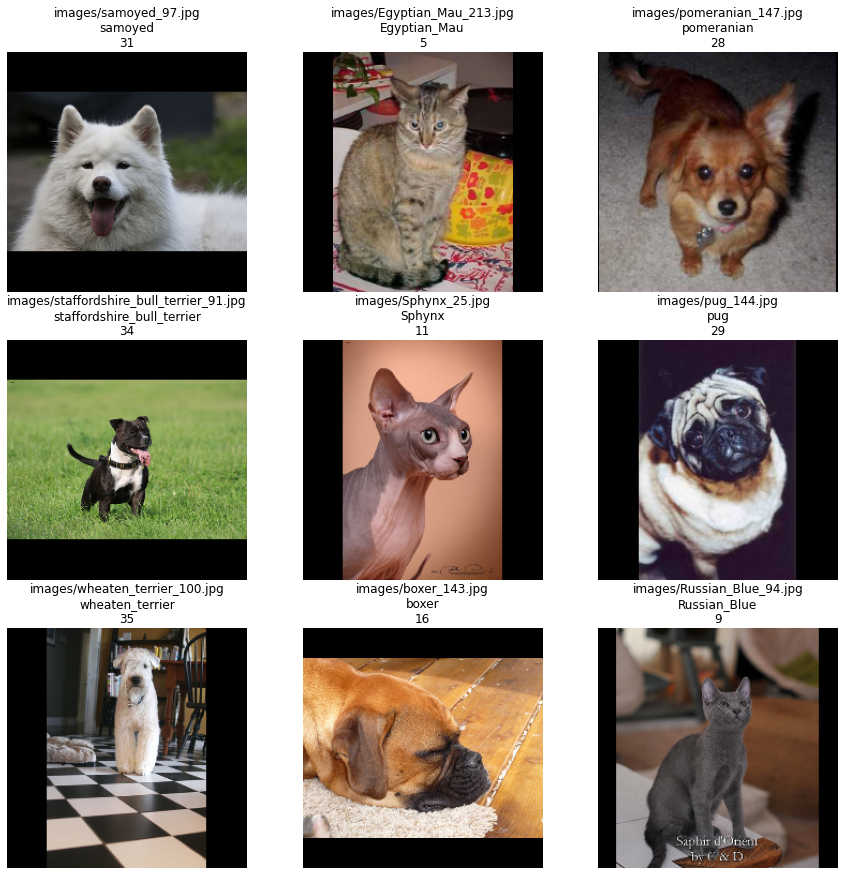

In [14]:
plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

for i, imgIndex in enumerate(np.random.randint(0, len(input_img_paths), size = 9)):
    plt.subplot(3, 3, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.title(f'{input_img_paths[imgIndex]}\n{targets[imgIndex]}\n{labelsEncoded[imgIndex]}')
    plt.imshow(input_imgs[imgIndex])
plt.show()

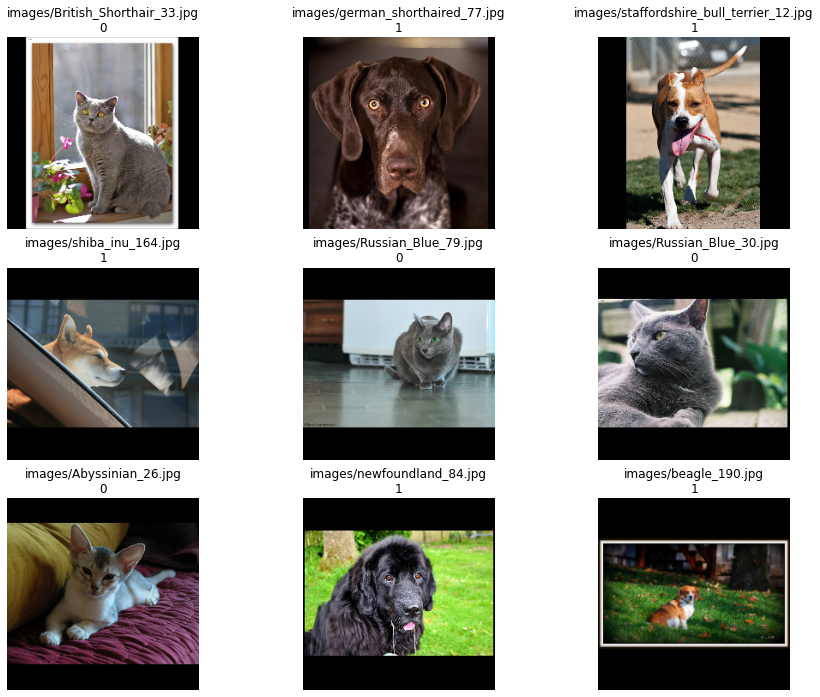

In [15]:
plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))

for i, imgIndex in enumerate(np.random.randint(0, len(input_img_paths), size = 9)):
    plt.subplot(3, 3, i + 1)
    plt.axis(False)
    plt.grid(False)
    plt.title(f'{input_img_paths[imgIndex]}\n{cats_vs_dogs[imgIndex]}')
    plt.imshow(input_imgs[imgIndex])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
IMAGE_SIZE = (224, 224)
RANDOM_STATE = 42
TRAIN_SIZE, VAL_SIZE, TEST_SIZE = 0.8, 0.1, 0.1

In [18]:
X_tv, X_test, y_tv, y_test = train_test_split(
    input_imgs, 
    labelsEncoded, 
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE, 
    stratify = targets
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_tv, 
    y_tv, 
    test_size = VAL_SIZE, 
    random_state = RANDOM_STATE, 
    stratify = y_tv
    )

print(f'Training Data: {X_train.shape}')
print(f'Training Labels: {len(y_train)}')
print(f'\nValidation Data: {X_val.shape}')
print(f'Validation Labels: {len(y_val)}')
print(f'\nTesting Data: {X_test.shape}')
print(f'Testing Labels: {len(y_test)}')

Training Data: (5985, 224, 224, 3)
Training Labels: 5985

Validation Data: (666, 224, 224, 3)
Validation Labels: 666

Testing Data: (739, 224, 224, 3)
Testing Labels: 739


In [19]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               #rotation_range = 30,
                               #width_shift_range = 0.1,
                               #height_shift_range = 0.1,
                               #shear_range = 0.1,
                               #zoom_range = 0.1,
                               #horizontal_flip = True,
                               fill_mode = 'nearest',
                               #preprocessing_function=to_grayscale_then_rgb)
                               )
train_data = train_gen.flow(x = X_train, y = y_train, batch_size = 32, shuffle = True)
len(train_data)

188

In [20]:
val_gen = ImageDataGenerator(rescale = 1./255, 
                             )
val_data = val_gen.flow(x = X_val, y = y_val, batch_size = 32, shuffle = True)
len(val_data)

21

In [21]:
test_gen = ImageDataGenerator(rescale = 1./255, 
                             )
                             
test_data = test_gen.flow(x = X_test, y = y_test, batch_size = 32, shuffle=False) # False because it must stay in the same order as the y_test, we will need it in the classification report 
len(test_data)

24

In [22]:
del input_imgs
del labelsEncoded
del X_tv
del y_tv

In [23]:
def plot_generator_images(gen, suptitle, labelDecDict, print_pred = False, model = None, nrows = 3, ncols = 3, figsize = (12, 12)):
    gen_data = gen.next()
    
    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    #plt.suptitle(suptitle, fontsize = 20)
    plt.tight_layout(rect = [0, 0, 1, 0.96], h_pad = 2)
    
    if(print_pred and model):
        pred = np.argmax(model.predict(gen_data[0]), axis=1)

    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.axis(False)
        plt.grid(False)
        
        if(print_pred and pred.any()):
            plt.title(f"True: {labelDecDict[gen_data[1][i]]}\nPredicted: {labelDecDict[pred[i]]}")
        else:
            plt.title(f'Label: {gen_data[1][i]}\nBreed: {labelDecDict[gen_data[1][i]]}')
        plt.imshow(gen_data[0][i])

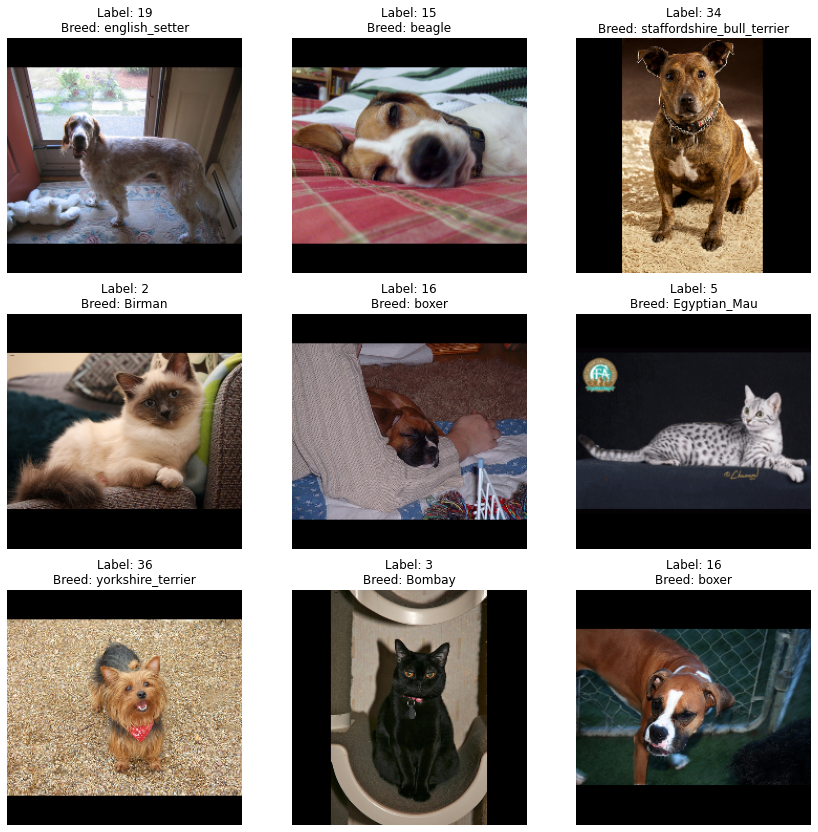

In [24]:
plot_generator_images(train_data, "Training data", labelDecDict)

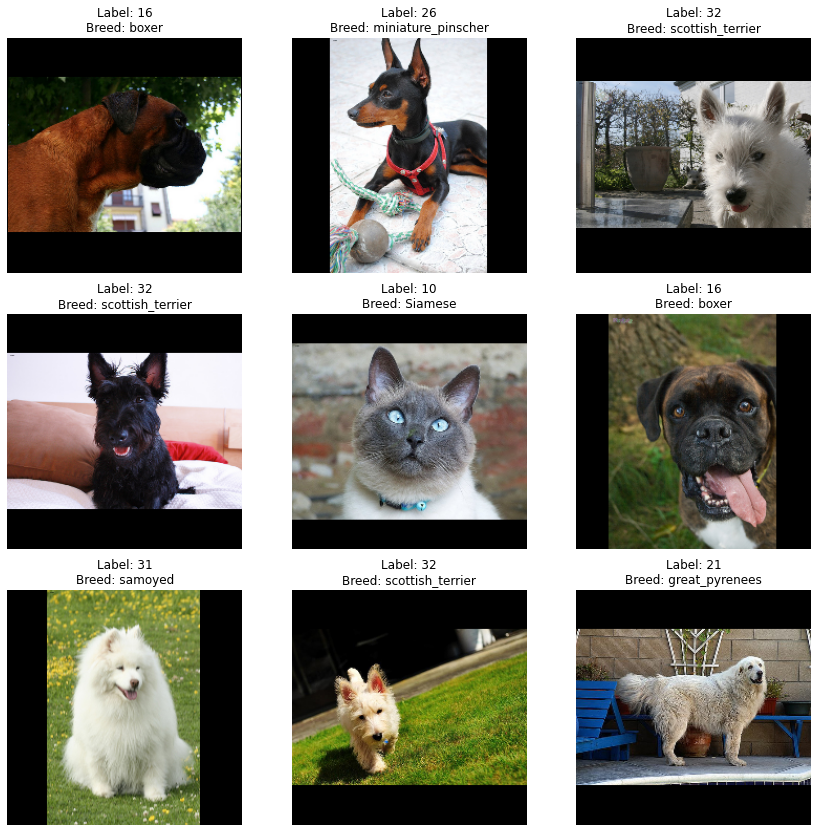

In [25]:
plot_generator_images(val_data, "Training data", labelDecDict)

Using a pre-trained TF2 SavedModel from TensorFlow Hub

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras

In [54]:
# Using a pre-trained TF2 SavedModel from TensorFlow Hub
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
resnset50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
efficientnetv2_s = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2'

classifier_model = {'mobilenet_v2':mobilenet_v2, 'efficientnetv2_s' : efficientnetv2_s,'resnset50':resnset50}

In [55]:
import tensorflow_hub as hub

In [ ]:
%%time
histories = {}
for name in classifier_model:
    pretrained_base = hub.KerasLayer(classifier_model[name], trainable = False)
    model = keras.Sequential([
        pretrained_base,
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(37, activation='softmax'), 
    ])
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    history = model.fit(
        train_data,
        validation_data= val_data,
        epochs=6,
    )
    histories[name] = history

Epoch 1/6
188/188 [==============================] - 14s 52ms/step - loss: 1.6538 - accuracy: 0.5375 - val_loss: 0.4671 - val_accuracy: 0.8679
Epoch 2/6
188/188 [==============================] - 9s 47ms/step - loss: 0.6913 - accuracy: 0.7851 - val_loss: 0.4018 - val_accuracy: 0.8814
Epoch 3/6
188/188 [==============================] - 9s 48ms/step - loss: 0.5195 - accuracy: 0.8394 - val_loss: 0.3577 - val_accuracy: 0.8919
Epoch 4/6
188/188 [==============================] - 9s 48ms/step - loss: 0.4149 - accuracy: 0.8660 - val_loss: 0.3545 - val_accuracy: 0.8904
Epoch 5/6
188/188 [==============================] - 9s 47ms/step - loss: 0.3766 - accuracy: 0.8804 - val_loss: 0.3486 - val_accuracy: 0.8919
Epoch 6/6
188/188 [==============================] - 9s 47ms/step - loss: 0.3380 - accuracy: 0.8904 - val_loss: 0.3476 - val_accuracy: 0.8964
Epoch 1/6
188/188 [==============================] - 39s 151ms/step - loss: 1.3054 - accuracy: 0.6428 - val_loss: 0.4316 - val_accuracy: 0.8694
Epo

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 flatten_6 (Flatten)         (None, 1001)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               128256    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 37)               

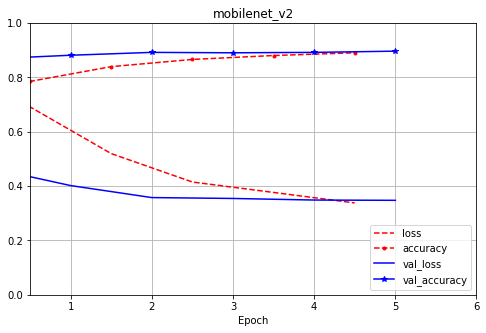

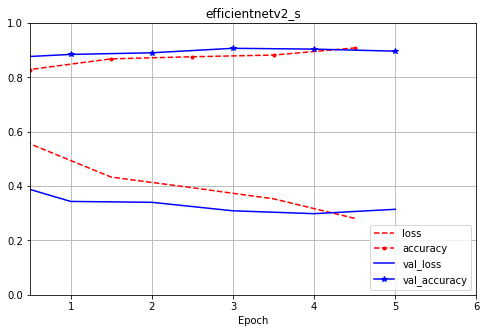

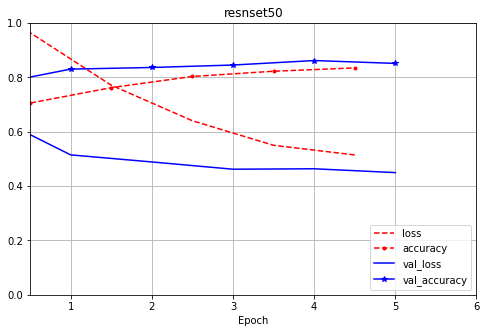

In [ ]:
for history in histories:
    plt.figure(figsize=(8, 5))
    for key, style in zip(histories[history].history, ["r--", "r--.", "b-", "b-*"]):
        epochs = np.array(histories[history].epoch) + (0 if key.startswith("val_") else -0.5)
        plt.plot(epochs, histories[history].history[key], style, label=key)
    #print(C)
    plt.title(f'{history}')
    plt.xlabel("Epoch")
    plt.axis([0.5, 6, 0., 1])
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()



In [52]:
def plot_generator_images(gen, suptitle, labelDecDict = None, print_pred = False, model = None, nrows = 3, ncols = 3, figsize = (12, 12)):
    gen_data = gen.next()
    
    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    #plt.suptitle(suptitle, fontsize = 20)
    plt.tight_layout(rect = [0, 0, 1, 0.96], h_pad = 2)
    
    if(print_pred and model):
        pred = model.predict(gen_data[0]).argmax(1)

    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.axis(False)
        plt.grid(False)
        
        if(print_pred and pred.any()):
            #plt.suptitle(suptitle, fontsize = 20)
            plt.title(f"\nTrue: {[gen_data[1][i]]}\nPredicted: {pred[i]}")
        else:
            plt.title(gen_data[1][i])
        plt.imshow(gen_data[0][i])

1/1 [==============================] - 0s 34ms/step


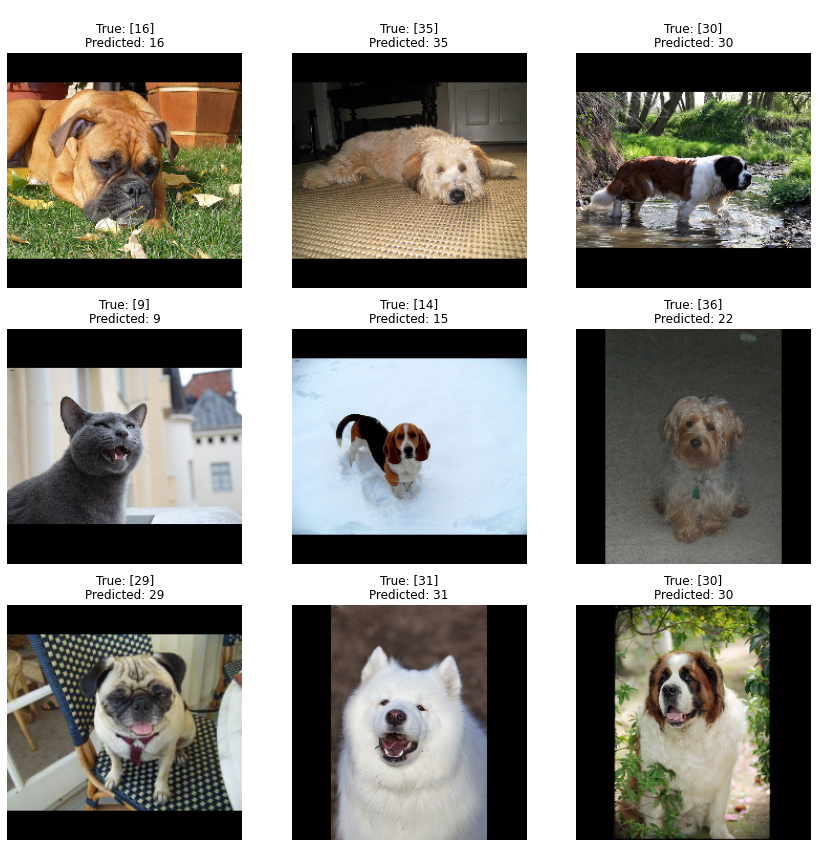

In [ ]:
# Predict on the last model
plot_generator_images(test_data, "Test data vs Predicts",
                      print_pred = True,model = model)

Transfer learning & fine-tuning

In [27]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, LeakyReLU, BatchNormalization, Activation

Build a model & Train the top layer

In [43]:
base_model = keras.applications.Xception(
    weights='imagenet', 
    input_shape=(224, 224, 3),
    include_top=False) 

83683744/83683744 [==============================] - 2s 0us/step


In [44]:
base_model.trainable=False
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = data_augmentation(x)
#x = Rescaling(1/255)(x)

x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = keras.layers.Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = keras.layers.Dropout(0.2)(x)


x = keras.layers.Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = keras.layers.Dropout(0.3)(x)

outputs = keras.layers.Dense(37, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 sequential (Sequential)     (None, 7, 7, None)        0         
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_10 (Bat  (None, 256)              1024      
 chNormalization)                                          

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5, mode = 'auto')


callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="base_Xception.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(train_data,epochs=100,validation_data= val_data,callbacks= [callbacks,es])

Epoch 1/100
188/188 [==============================] - 41s 189ms/step - loss: 0.7892 - accuracy: 0.7696 - val_loss: 0.4739 - val_accuracy: 0.8393
Epoch 2/100
188/188 [==============================] - 32s 172ms/step - loss: 0.4448 - accuracy: 0.8595 - val_loss: 0.4762 - val_accuracy: 0.8709
Epoch 3/100
188/188 [==============================] - 33s 173ms/step - loss: 0.3164 - accuracy: 0.8969 - val_loss: 0.5648 - val_accuracy: 0.8529
Epoch 4/100
188/188 [==============================] - 32s 173ms/step - loss: 0.2517 - accuracy: 0.9126 - val_loss: 0.5762 - val_accuracy: 0.8739
Epoch 5/100
188/188 [==============================] - 32s 172ms/step - loss: 0.1981 - accuracy: 0.9327 - val_loss: 0.5108 - val_accuracy: 0.8844
Epoch 6/100
188/188 [==============================] - 32s 171ms/step - loss: 0.1649 - accuracy: 0.9465 - val_loss: 0.5650 - val_accuracy: 0.8694


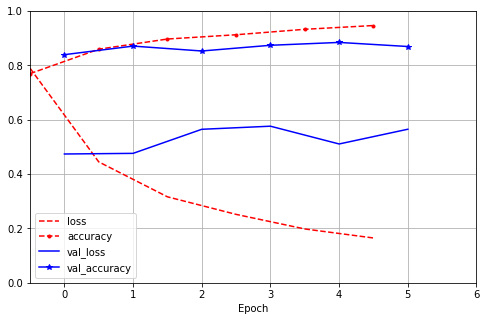

In [50]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 6, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [49]:
# Evaluate the model
loss, acc = model.evaluate(test_data, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

24/24 - 4s - loss: 0.5595 - accuracy: 0.8674 - 4s/epoch - 154ms/step
Restored model, accuracy: 86.74%


1/1 [==============================] - 1s 836ms/step


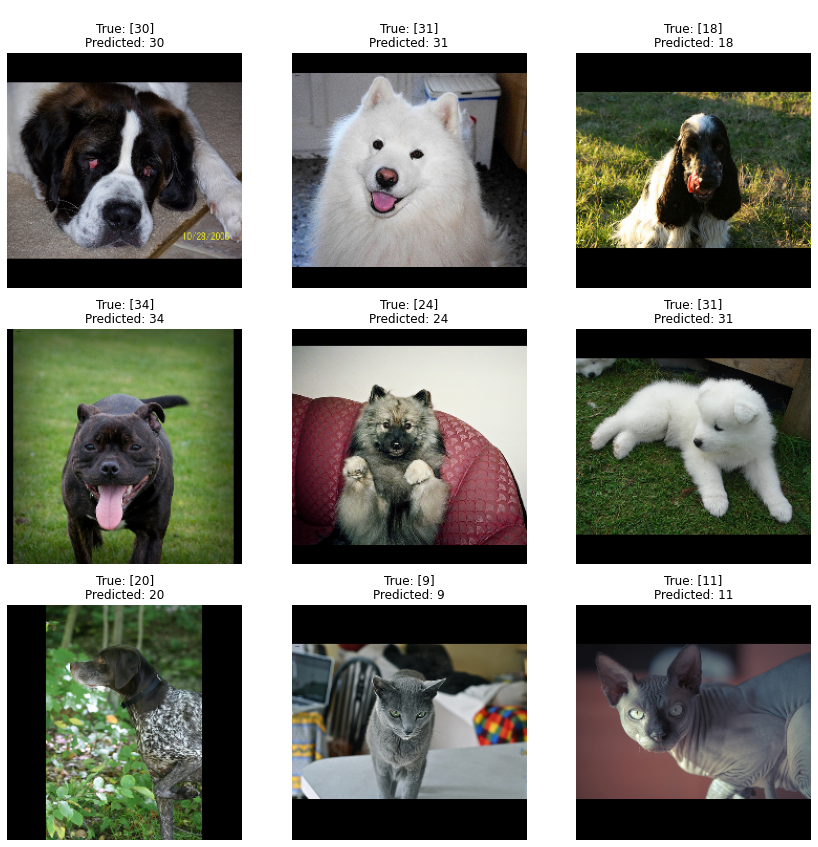

In [53]:
plot_generator_images(test_data, "Test data vs Predicts",
                      print_pred = True,model = model)

Unfreeze the base model and train the entire model end-to-end with a low learning rate

In [ ]:
base_model.trainable = True
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 sequential (Sequential)     (None, 7, 7, 2048)        0         
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_56 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_25 (Bat  (None, 256)              1024      
 chNormalization)                                          

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-5),  # Low learning rate
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

epochs = 10
history = model.fit(train_data, epochs=epochs, validation_data=val_data)

Epoch 1/10
188/188 [==============================] - 139s 682ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.5120 - val_accuracy: 0.8964
Epoch 2/10
188/188 [==============================] - 130s 692ms/step - loss: 0.0178 - accuracy: 0.9931 - val_loss: 0.4858 - val_accuracy: 0.8979
Epoch 3/10
188/188 [==============================] - 130s 691ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.4995 - val_accuracy: 0.9054
Epoch 4/10
188/188 [==============================] - 130s 691ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.5129 - val_accuracy: 0.9174
Epoch 5/10
188/188 [==============================] - 130s 694ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.4899 - val_accuracy: 0.8904
Epoch 6/10
188/188 [==============================] - 130s 692ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.5401 - val_accuracy: 0.8934
Epoch 7/10
188/188 [==============================] - 130s 693ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.4921 -

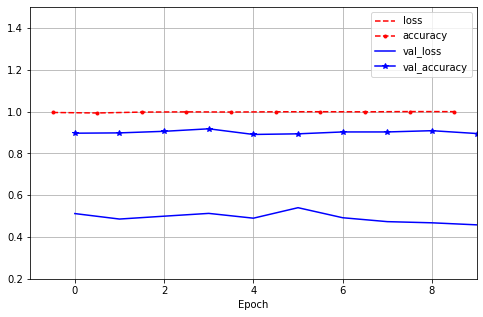

In [ ]:
plt.figure(figsize=(8, 5))
for key, style in zip(model.history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(model.history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, model.history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-1, 9, 0.2, 1.5])
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [ ]:
# Re-evaluate the model
loss, acc = model.evaluate(test_data, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

24/24 - 3s - loss: 0.6011 - accuracy: 0.9093 - 3s/epoch - 133ms/step
Restored model, accuracy: 90.93%


1/1 [==============================] - 1s 845ms/step


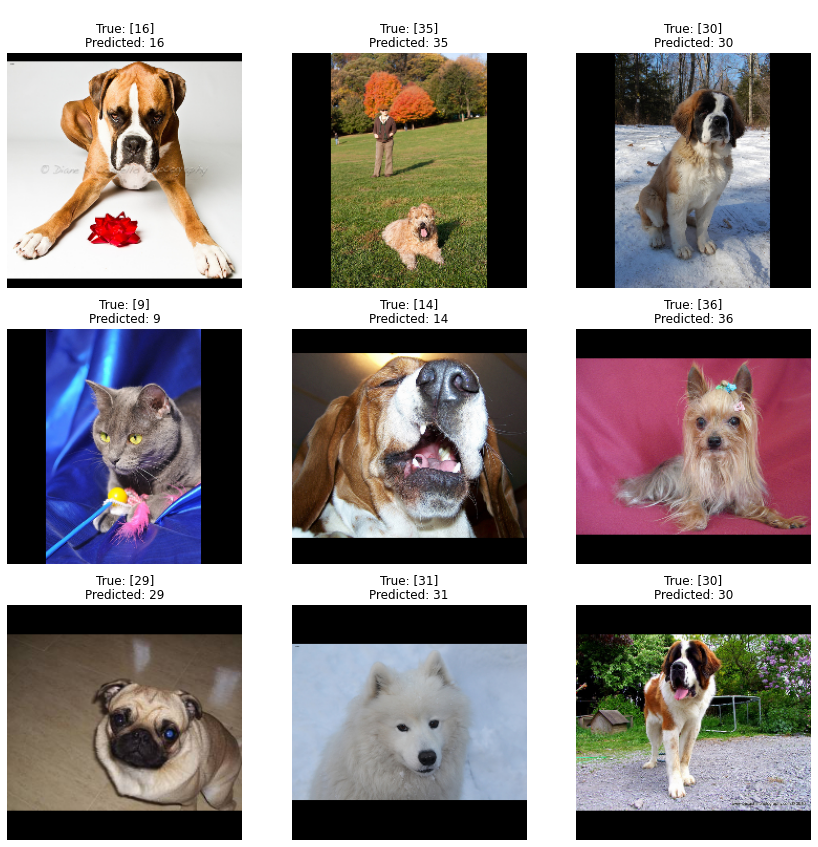

In [ ]:
plot_generator_images(test_data, "Test data vs Predicts",
                      print_pred = True,model = model)

In [ ]:
preds = model.predict(test_data)

24/24 [==============================] - 4s 135ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds.argmax(1)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.87      1.00      0.93        20
           2       0.93      0.65      0.76        20
           3       0.90      0.95      0.93        20
           4       0.89      0.80      0.84        20
           5       1.00      0.95      0.97        20
           6       0.77      0.85      0.81        20
           7       0.90      0.90      0.90        20
           8       0.69      0.90      0.78        20
           9       0.85      0.85      0.85        20
          10       0.89      0.85      0.87        20
          11       0.95      1.00      0.98        20
          12       0.89      0.85      0.87        20
          13       0.83      0.75      0.79        20
          14       0.95      0.95      0.95        20
          15       1.00      0.85      0.92        20
          16       1.00      0.95      0.97        20
          17       0.85    